In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import random
import time
from numpy.random import seed
from numpy.random import randint
import heapq

In [3]:
class Graph:
    def __init__(self, num_vertices, num_edges):
        self.num_vertices = num_vertices
        self.adj_list = [[] for _ in range(num_vertices)]

        # Fixed number of edges based on (num_vertices * num_vertices) // 4
        for _ in range(num_edges):
            index = random.randint(0, num_vertices - 1)
            vertice = random.randint(0, num_vertices - 1)
            while index == vertice:
                vertice = random.randint(0, num_vertices - 1)
            weight = random.randint(1, 10)
            self.adj_list[index].append((vertice, weight))

def dijkstra(graph, start):
    distance = [np.inf for i in range(num_vertices)]
    distance[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        edges, vertex = heapq.heappop(priority_queue)
        if edges > distance[vertex]:
            continue
        for i, j in graph.adj_list[vertex]:
            if distance[i] > distance[vertex] + j:
                distance[i] = distance[vertex] + j
                heapq.heappush(priority_queue, (distance[i], i))

    return distance


Number of vertices: 10, Execution time: 0.000018 seconds
Number of vertices: 20, Execution time: 0.000030 seconds
Number of vertices: 30, Execution time: 0.000048 seconds
Number of vertices: 40, Execution time: 0.000082 seconds
Number of vertices: 50, Execution time: 0.000170 seconds


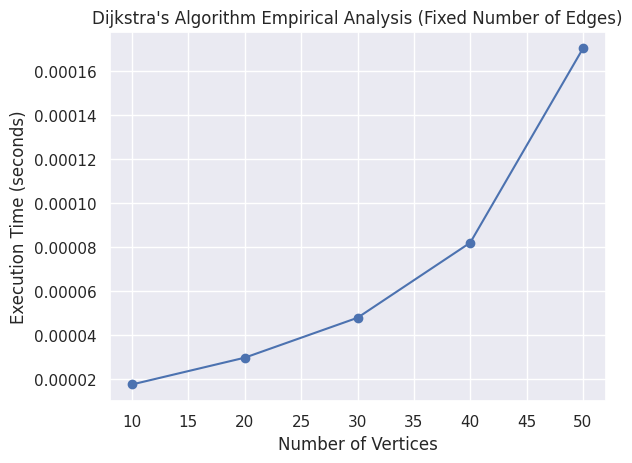

In [4]:
# Empirical analysis
if __name__ == "__main__":
    num_vertices_list = [i for i in range(10,51,10)]  # Varying number of vertices
    fixed_num_edges = [(v * v) // 4 for v in num_vertices_list]
    execution_times = []

    for num_vertices, num_edges in zip(num_vertices_list, fixed_num_edges):
        graph = Graph(num_vertices, num_edges)

        start_time = time.time()
        distances = dijkstra(graph, 0)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        print(f"Number of vertices: {num_vertices}, Execution time: {execution_time:.6f} seconds")

    # Plotting the results
    import matplotlib.pyplot as plt

    plt.plot(num_vertices_list, execution_times, marker='o')
    plt.xlabel("Number of Vertices")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra's Algorithm Empirical Analysis (Fixed Number of Edges)")
    plt.show()


Number of edges: 50, Execution time: 0.000008 seconds
Number of edges: 100, Execution time: 0.000031 seconds
Number of edges: 150, Execution time: 0.000048 seconds
Number of edges: 200, Execution time: 0.000057 seconds
Number of edges: 250, Execution time: 0.000064 seconds


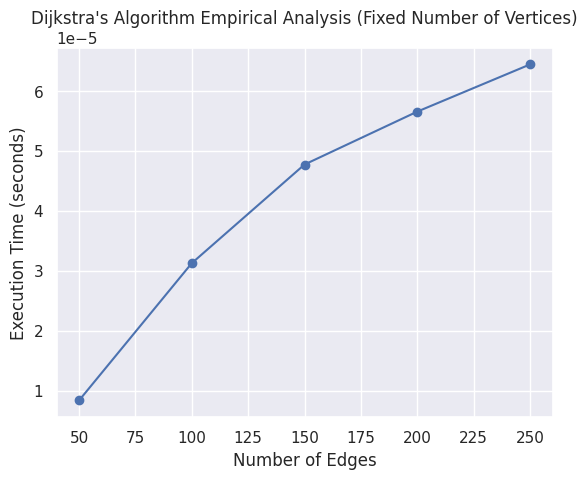

In [5]:

# Empirical analysis
if __name__ == "__main__":
    num_vertices = 50
    edge_counts = [50, 100, 150, 200, 250]
    execution_times = []

    for num_edges in edge_counts:
        graph = Graph(num_vertices, num_edges)

        start_time = time.time()
        distances = dijkstra(graph, 0)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        print(f"Number of edges: {num_edges}, Execution time: {execution_time:.6f} seconds")

    # Plotting the results
    import matplotlib.pyplot as plt

    plt.plot(edge_counts, execution_times, marker='o')
    plt.xlabel("Number of Edges")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra's Algorithm Empirical Analysis (Fixed Number of Vertices)")
    plt.show()
